## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [48]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [49]:
X.shape

(50,)

In [50]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

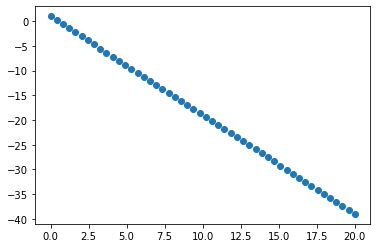

In [51]:
plt.scatter(X,y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [52]:
th0 = []
th1 = []
loss = []
lines = []
def GD(X,y,alpha,iter_max):
    
    theta_0,theta_1 =0,0
   
    
    for i in range(iter_max):
        print(f'****************** iteration{i}**************************')
        yhat = theta_0 + theta_1 * X
        lines.append(yhat)
        print("h(x):",yhat)
        m = len(X)
        e = yhat - y
        print("Error Vector:\n",e)
        J = (e @ e)/(2*m)
        print("j = ",J)
        loss.append(J)
        d_theta_0 = np.sum(e)/m
        d_theta_1 = (e @ X)/m
        print("d_theta_0 : ",d_theta_0)
        print("d_theta_1 : ",d_theta_1)
        theta_0 = theta_0 - (alpha * d_theta_0)
        th0.append(theta_0)

        theta_1 = theta_1 - (alpha * d_theta_1)
        th1.append(theta_1)
        
        print("theta_0_new : ",theta_0)
        print("theta_1_new : ",theta_1)
        Grad_norm = np.sqrt(((d_theta_0)**2 + (d_theta_1)**2))
        print("Gradient Norm = ",Grad_norm)
        print("predicted Y: \n",yhat)
        if i != 0 and (Grad_norm < 0.001 or abs(loss[-1] - loss[-2]) < 0.001):
            break
        


#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [53]:
GD(X,y,0.0005,300)

****************** iteration0**************************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j =  249.88775510204084
d_theta_0 :  19.0
d_theta_1 :  259.38775510204084
theta_0_new :  -0.0095
theta_1_new :  -0.12969387755102044
Gradient Norm =  260.082693

predicted Y: 
 [ -0.13138613  -0.90620072  -1.6810153   -2.45582989  -3.23064447
  -4.00545906  -4.78027365  -5.55508823  -6.32990282  -7.1047174
  -7.87953199  -8.65434657  -9.42916116 -10.20397574 -10.97879033
 -11.75360491 -12.5284195  -13.30323408 -14.07804867 -14.85286325
 -15.62767784 -16.40249242 -17.17730701 -17.95212159 -18.72693618
 -19.50175076 -20.27656535 -21.05137993 -21.82619452 -22.6010091
 -23.37582369 -24.15063827 -24.92545286 -25.70026744 -26.47508203
 -27.24989661 -28.0247112  -28.79952578 -29.57434037 -30.34915495
 -31.12396954 -31.89878412 -32.67359871 -33.44841329 -34.22322788
 -34.99804246 -35.77285705 -36.54767163 -37.32248622 -38.0973008 ]
****************** iteration68**************************
h(x): [ -0.13132896  -0.9066303   -1.68193164  -2.45723297  -3.23253431
  -4.00783564  -4.78313698  -5.55843832  -6.33373965  -7.10904099
  -7.88434233  -8.65964366  -9.434945   -10.21024633 -10.98554767
 -11.76084901 -12.53615034 -13.31145168 -14.08675301 -14.86205435

#### Calculate r2 score

In [54]:
yhat = th0[-1] + th1[-1]*X
yhat

array([ -0.13059046,  -0.90903905,  -1.68748764,  -2.46593623,
        -3.24438482,  -4.02283341,  -4.801282  ,  -5.57973059,
        -6.35817918,  -7.13662777,  -7.91507636,  -8.69352495,
        -9.47197354, -10.25042214, -11.02887073, -11.80731932,
       -12.58576791, -13.3642165 , -14.14266509, -14.92111368,
       -15.69956227, -16.47801086, -17.25645945, -18.03490804,
       -18.81335663, -19.59180522, -20.37025381, -21.1487024 ,
       -21.92715099, -22.70559958, -23.48404817, -24.26249676,
       -25.04094535, -25.81939394, -26.59784253, -27.37629112,
       -28.15473971, -28.9331883 , -29.71163689, -30.49008548,
       -31.26853407, -32.04698266, -32.82543125, -33.60387984,
       -34.38232843, -35.16077702, -35.93922561, -36.7176742 ,
       -37.49612279, -38.27457138])

In [55]:
from sklearn.metrics import r2_score
r2_score(y,yhat)

0.9975512733076476

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

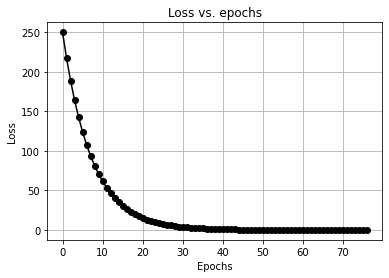

In [56]:
def lossVsepochs(loss):
    plt.plot(loss,'o-',color = "black")
    plt.title("Loss vs. epochs")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.grid()
lossVsepochs(loss)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

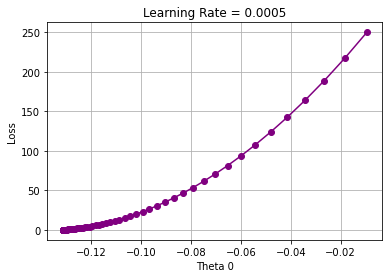

In [57]:
def lossVStheta0(theta0,loss,a):
    plt.plot(th0,loss,'o-',color = 'purple')
    plt.title(f"Learning Rate = {a}")
    plt.ylabel("Loss")
    plt.xlabel("Theta 0")
    plt.grid()
    
lossVStheta0(th0,loss,0.0005)

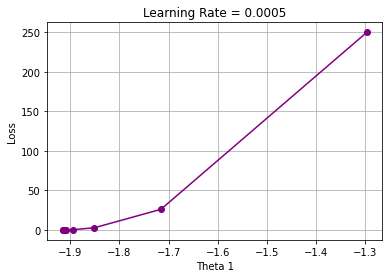

In [70]:
def lossVStheta1(theta1,loss,a):
    plt.plot(th1,loss,'o-',color = 'purple')
    plt.title(f"Learning Rate = {a}")
    plt.ylabel("Loss")
    plt.xlabel("Theta 1")
    plt.grid()
    
lossVStheta1(th1,loss,0.0005)

#### Plot all regression lines till converge

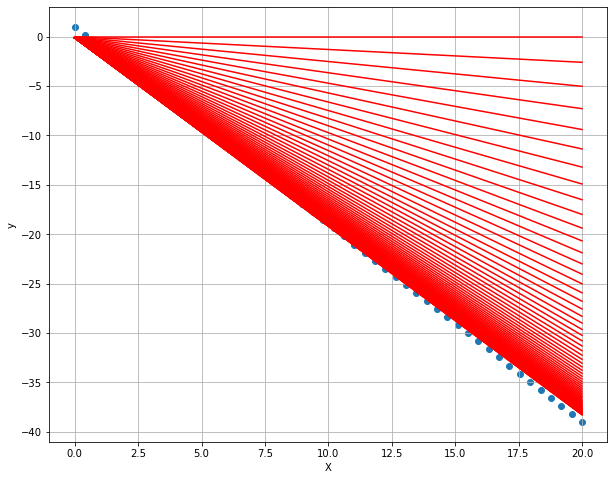

In [59]:
def all_Reg(x,lines,y):
    plt.figure(figsize=(10,8))
    for line in lines:
        plt.plot(x,line,'r')
    plt.scatter(x,y)
    plt.grid()
    plt.ylabel("y")
    plt.xlabel("X")
    plt.show()
all_Reg(X,lines,y)  

#### Plot the best regression line

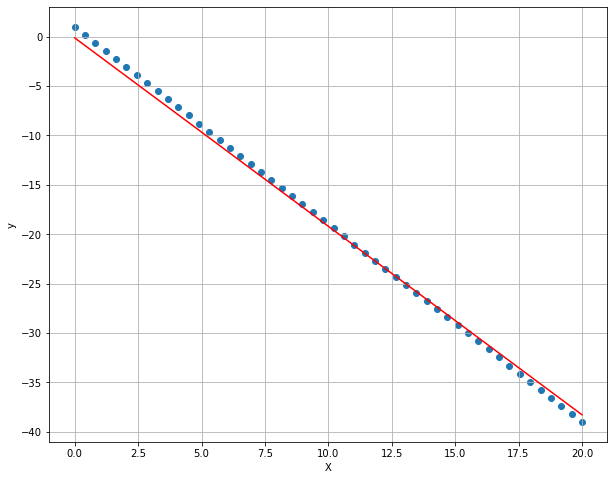

In [60]:
def best_Reg(x,y,lines):
    line = lines[-1]
    plt.figure(figsize=(10,8))
    plt.plot(x,line,'r')
    plt.scatter(x,y)
    plt.grid()
    plt.ylabel("y")
    plt.xlabel("X")
    plt.show()
best_Reg(X,y,lines)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [61]:
th0 = []
th1 = []
loss = []
lines = []
GD(X,y,0.00005,1000)

****************** iteration0**************************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j =  249.88775510204084
d_theta_0 :  19.0
d_theta_1 :  259.38775510204084
theta_0_new :  -0.00095
theta_1_new :  -0.012969387755102042
Gradient Norm =  260.0826

j =  99.27776093644796
d_theta_0 :  11.861742723858882
d_theta_1 :  163.419210280728
theta_0_new :  -0.05230547542331306
theta_1_new :  -0.7168254492994364
Gradient Norm =  163.8491355766756
predicted Y: 
 [ -0.05171239  -0.34095912  -0.63020585  -0.91945258  -1.20869931
  -1.49794604  -1.78719277  -2.0764395   -2.36568623  -2.65493296
  -2.94417969  -3.23342642  -3.52267315  -3.81191988  -4.10116661
  -4.39041334  -4.67966007  -4.9689068   -5.25815353  -5.54740026
  -5.83664699  -6.12589372  -6.41514045  -6.70438718  -6.99363391
  -7.28288064  -7.57212737  -7.8613741   -8.15062083  -8.43986756
  -8.72911429  -9.01836102  -9.30760775  -9.59685448  -9.88610121
 -10.17534794 -10.46459467 -10.7538414  -11.04308813 -11.33233486
 -11.62158159 -11.91082832 -12.20007505 -12.48932178 -12.77856851
 -13.06781524 -13.35706197 -13.6463087  -13.93555543 -14.22480216]
****************** iteration69**************************
h(x): [ -0.05230548  -0.34488729  -0.63746911  -0.93005092  -1.22263274
  -1

j =  44.62041594199121
d_theta_0 :  7.847656832446776
d_theta_1 :  109.45177039131787
theta_0_new :  -0.08088202848693268
theta_1_new :  -1.1126579407103572
Gradient Norm =  109.73274697898351
predicted Y: 
 [ -0.08048965  -0.53240203  -0.98431442  -1.43622681  -1.8881392
  -2.34005159  -2.79196398  -3.24387637  -3.69578875  -4.14770114
  -4.59961353  -5.05152592  -5.50343831  -5.9553507   -6.40726309
  -6.85917548  -7.31108786  -7.76300025  -8.21491264  -8.66682503
  -9.11873742  -9.57064981 -10.0225622  -10.47447458 -10.92638697
 -11.37829936 -11.83021175 -12.28212414 -12.73403653 -13.18594892
 -13.63786131 -14.08977369 -14.54168608 -14.99359847 -15.44551086
 -15.89742325 -16.34933564 -16.80124803 -17.25316041 -17.7050728
 -18.15698519 -18.60889758 -19.06080997 -19.51272236 -19.96463475
 -20.41654713 -20.86845952 -21.32037191 -21.7722843  -22.22419669]
****************** iteration128**************************
h(x): [ -0.08088203  -0.53502813  -0.98917422  -1.44332032  -1.89746642
  -

theta_1_new :  -1.3957331152047752
Gradient Norm =  71.0353714611278
predicted Y: 
 [ -0.10074965  -0.6689905   -1.23723135  -1.80547219  -2.37371304
  -2.94195389  -3.51019474  -4.07843558  -4.64667643  -5.21491728
  -5.78315813  -6.35139897  -6.91963982  -7.48788067  -8.05612152
  -8.62436236  -9.19260321  -9.76084406 -10.32908491 -10.89732575
 -11.4655666  -12.03380745 -12.6020483  -13.17028914 -13.73852999
 -14.30677084 -14.87501169 -15.44325253 -16.01149338 -16.57973423
 -17.14797508 -17.71621592 -18.28445677 -18.85269762 -19.42093847
 -19.98917931 -20.55742016 -21.12566101 -21.69390186 -22.2621427
 -22.83038355 -23.3986244  -23.96686524 -24.53510609 -25.10334694
 -25.67158779 -26.23982863 -26.80806948 -27.37631033 -27.94455118]
****************** iteration192**************************
h(x): [ -0.10099852  -0.67068551  -1.24037249  -1.81005948  -2.37974646
  -2.94943345  -3.51912043  -4.08880742  -4.65849441  -5.22818139
  -5.79786838  -6.36755536  -6.93724235  -7.50692933  -8.076

 -29.03095806 -29.67357093 -30.3161838  -30.95879667 -31.60140954]
****************** iteration255**************************
h(x): [ -0.11353606  -0.75709162  -1.40064718  -2.04420273  -2.68775829
  -3.33131385  -3.97486941  -4.61842497  -5.26198052  -5.90553608
  -6.54909164  -7.1926472   -7.83620275  -8.47975831  -9.12331387
  -9.76686943 -10.41042499 -11.05398054 -11.6975361  -12.34109166
 -12.98464722 -13.62820277 -14.27175833 -14.91531389 -15.55886945
 -16.202425   -16.84598056 -17.48953612 -18.13309168 -18.77664724
 -19.42020279 -20.06375835 -20.70731391 -21.35086947 -21.99442502
 -22.63798058 -23.28153614 -23.9250917  -24.56864726 -25.21220281
 -25.85575837 -26.49931393 -27.14286949 -27.78642504 -28.4299806
 -29.07353616 -29.71709172 -30.36064728 -31.00420283 -31.64775839]
Error Vector:
 [-1.11353606 -0.94076509 -0.76799412 -0.59522314 -0.42245217 -0.2496812
 -0.07691022  0.09586075  0.26863172  0.44140269  0.61417367  0.78694464
  0.95971561  1.13248659  1.30525756  1.47802853 

d_theta_0 :  1.9774950149602915
d_theta_1 :  30.525156337577847
theta_0_new :  -0.12119270220676012
theta_1_new :  -1.6916673735752485
Gradient Norm =  30.589142779224165
predicted Y: 
 [ -0.12109383  -0.81094734  -1.50080086  -2.19065438  -2.88050789
  -3.57036141  -4.26021493  -4.95006844  -5.63992196  -6.32977548
  -7.01962899  -7.70948251  -8.39933603  -9.08918954  -9.77904306
 -10.46889658 -11.15875009 -11.84860361 -12.53845713 -13.22831064
 -13.91816416 -14.60801768 -15.29787119 -15.98772471 -16.67757823
 -17.36743174 -18.05728526 -18.74713878 -19.43699229 -20.12684581
 -20.81669933 -21.50655284 -22.19640636 -22.88625988 -23.57611339
 -24.26596691 -24.95582043 -25.64567394 -26.33552746 -27.02538098
 -27.71523449 -28.40508801 -29.09494153 -29.78479504 -30.47464856
 -31.16450208 -31.85435559 -32.54420911 -33.23406263 -33.92391614]
****************** iteration316**************************
h(x): [ -0.1211927   -0.81166918  -1.50214566  -2.19262214  -2.88309862
  -3.5735751   -4.26405

j =  1.6947769318033046
d_theta_0 :  1.2180270610356003
d_theta_1 :  20.312015787564587
theta_0_new :  -0.12588980315992532
theta_1_new :  -1.7666300045051309
Gradient Norm =  20.348503022966778
predicted Y: 
 [ -0.1258289   -0.84648784  -1.56714678  -2.28780572  -3.00846466
  -3.7291236   -4.44978254  -5.17044148  -5.89110042  -6.61175936
  -7.3324183   -8.05307725  -8.77373619  -9.49439513 -10.21505407
 -10.93571301 -11.65637195 -12.37703089 -13.09768983 -13.81834877
 -14.53900771 -15.25966665 -15.98032559 -16.70098453 -17.42164347
 -18.14230241 -18.86296135 -19.58362029 -20.30427923 -21.02493817
 -21.74559711 -22.46625605 -23.18691499 -23.90757393 -24.62823287
 -25.34889181 -26.06955075 -26.79020969 -27.51086863 -28.23152757
 -28.95218651 -29.67284545 -30.39350439 -31.11416333 -31.83482227
 -32.55548121 -33.27614016 -33.9967991  -34.71745804 -35.43811698]
****************** iteration376**************************
h(x): [ -0.1258898   -0.84696327  -1.56803675  -2.28911022  -3.01018369

d_theta_1 :  13.518416727055193
theta_0_new :  -0.12872224361544765
theta_1_new :  -1.8165154886374089
Gradient Norm =  13.537202166174884
predicted Y: 
 [ -0.1286866   -0.8698456   -1.61100461  -2.35216362  -3.09332263
  -3.83448163  -4.57564064  -5.31679965  -6.05795866  -6.79911766
  -7.54027667  -8.28143568  -9.02259468  -9.76375369 -10.5049127
 -11.24607171 -11.98723071 -12.72838972 -13.46954873 -14.21070774
 -14.95186674 -15.69302575 -16.43418476 -17.17534376 -17.91650277
 -18.65766178 -19.39882079 -20.13997979 -20.8811388  -21.62229781
 -22.36345682 -23.10461582 -23.84577483 -24.58693384 -25.32809284
 -26.06925185 -26.81041086 -27.55156987 -28.29272887 -29.03388788
 -29.77504689 -30.5162059  -31.2573649  -31.99852391 -32.73968292
 -33.48084192 -34.22200093 -34.96315994 -35.70431895 -36.44547795]
****************** iteration436**************************
h(x): [ -0.12872224  -0.87015714  -1.61159203  -2.35302692  -3.09446182
  -3.83589671  -4.5773316   -5.3187665   -6.06020139  -6

h(x): [ -0.13027664  -0.88489587  -1.63951509  -2.39413431  -3.14875353
  -3.90337275  -4.65799198  -5.4126112   -6.16723042  -6.92184964
  -7.67646887  -8.43108809  -9.18570731  -9.94032653 -10.69494576
 -11.44956498 -12.2041842  -12.95880342 -13.71342264 -14.46804187
 -15.22266109 -15.97728031 -16.73189953 -17.48651876 -18.24113798
 -18.9957572  -19.75037642 -20.50499565 -21.25961487 -22.01423409
 -22.76885331 -23.52347253 -24.27809176 -25.03271098 -25.7873302
 -26.54194942 -27.29656865 -28.05118787 -28.80580709 -29.56042631
 -30.31504554 -31.06966476 -31.82428398 -32.5789032  -33.33352243
 -34.08814165 -34.84276087 -35.59738009 -36.35199931 -37.10661854]
Error Vector:
 [-1.13027664 -1.06856933 -1.00686203 -0.94515472 -0.88344741 -0.8217401
 -0.76003279 -0.69832548 -0.63661818 -0.57491087 -0.51320356 -0.45149625
 -0.38978894 -0.32808163 -0.26637433 -0.20466702 -0.14295971 -0.0812524
 -0.01954509  0.04216221  0.10386952  0.16557683  0.22728414  0.28899145
  0.35069876  0.41240606  0.4

 [-1.13105058 -1.07824157 -1.02543255 -0.97262354 -0.91981452 -0.86700551
 -0.81419649 -0.76138748 -0.70857846 -0.65576945 -0.60296043 -0.55015142
 -0.4973424  -0.44453339 -0.39172437 -0.33891536 -0.28610634 -0.23329733
 -0.18048831 -0.1276793  -0.07487028 -0.02206127  0.03074775  0.08355676
  0.13636578  0.18917479  0.24198381  0.29479282  0.34760183  0.40041085
  0.45321986  0.50602888  0.55883789  0.61164691  0.66445592  0.71726494
  0.77007395  0.82288297  0.87569198  0.928501    0.98131001  1.03411903
  1.08692804  1.13973706  1.19254607  1.24535509  1.2981641   1.35097312
  1.40378213  1.45659115]
j =  0.3036300551331266
d_theta_0 :  0.16277028266102916
d_theta_1 :  6.116469092938989
theta_0_new :  -0.13105872085372874
theta_1_new :  -1.8709237369545844
Gradient Norm =  6.118634515134521
predicted Y: 
 [ -0.13105058  -0.8945681   -1.65808561  -2.42160313  -3.18512065
  -3.94863816  -4.71215568  -5.47567319  -6.23919071  -7.00270822
  -7.76622574  -8.52974326  -9.29326077 -10.0567

In [62]:
from sklearn.metrics import r2_score
r2_score(y,yhat)

0.9975512733076476

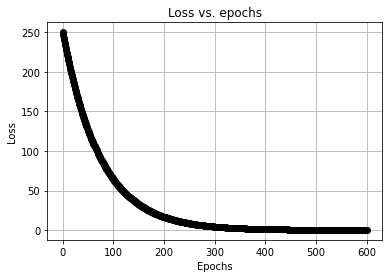

In [63]:
lossVsepochs(loss)

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [72]:
th0 = []
th1 = []
loss = []
lines = []
GD(X,y,0.005,300)

****************** iteration0**************************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j =  249.88775510204084
d_theta_0 :  19.0
d_theta_1 :  259.38775510204084
theta_0_new :  -0.095
theta_1_new :  -1.2969387755102042
Gradient Norm =  260.08269357

In [73]:
from sklearn.metrics import r2_score
r2_score(y,yhat)

0.9975512733076476

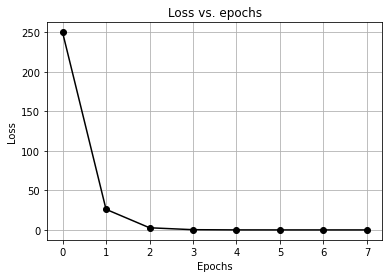

In [74]:
lossVsepochs(loss)

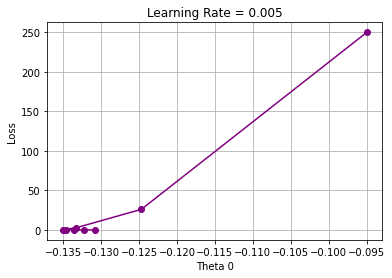

In [75]:
lossVStheta0(th0,loss,0.005)

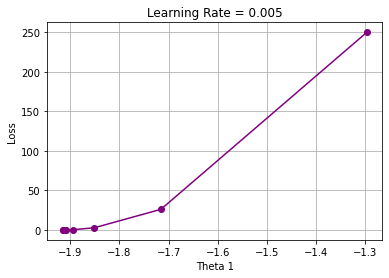

In [76]:
lossVStheta1(th1,loss,0.005)

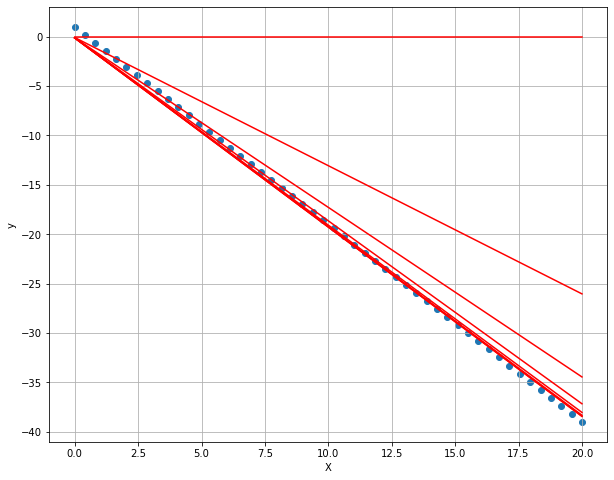

In [77]:
all_Reg(X,lines,y)

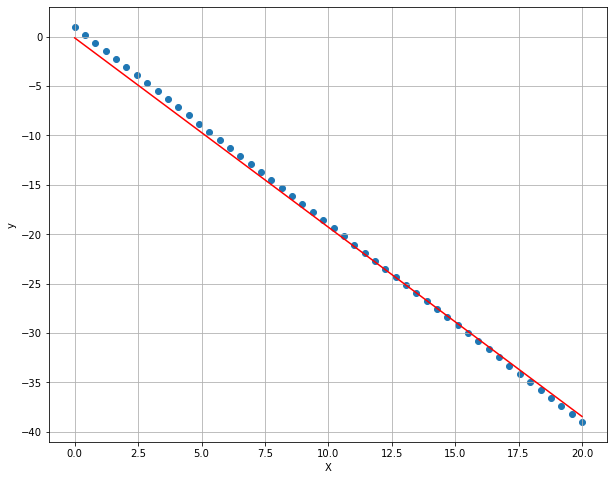

In [78]:
best_Reg(X,y,lines)

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [120]:
def SGD(x,y,alpha,iter_max):
    theta_0,theta_1 =0,0
    ep = 0
    
    for i in range(iter_max):
        #print(f'****************** iteration{i}**************************')
        y_pred = []
        for obs in range(len(x)):
            yhat = theta_0 + theta_1 * X[obs]
            
            e = yhat - y[obs]
            j = e**2 / 2
            loss.append(j)


            d_theta_0 = e
            d_theta_1 = (e * x[obs])
            

            theta_0 = theta_0 - (alpha * d_theta_0)
            theta_1 = theta_1 - (alpha * d_theta_1)
            th0.append(theta_0)
            th1.append(theta_1)
            y_pred.append(yhat)
            
            
        Grad_norm = np.sqrt(((d_theta_0)**2 + (d_theta_1)**2))
        lines.append(y_pred)
       
        
        if (i%x.shape[0]) == 0:
            print(f'****************** Epoch{ep}**************************')
            print("\nCost= ",loss[-1])
            print("\nGradient Norm = ",Grad_norm)
            print(f"\nGrad_vector: \n[[{d_theta_0}],[{d_theta_1}]]")
            print("theta_0_new= ",th0[-1])
            print("theta_1_new= ",th1[-1])
            ep += 1
            
        if i != 0 and (Grad_norm < 0.001 or abs(loss[-1] - loss[-2]) < 0.001):
            break
            
    
        

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [98]:
X_ = X.reshape((50,1))
y_ = y.reshape((50,1))

data = np.concatenate([X_,y_],axis = 1)
np.random.shuffle(data)
X = data[:,0]
y = data[:,1]
print(X,y)


[ 5.30612245  1.63265306 11.02040816 14.28571429 10.6122449  15.91836735
  5.71428571 14.69387755  6.93877551  3.67346939 12.65306122  2.04081633
 10.20408163  9.3877551   6.53061224  8.16326531 12.24489796  0.
  7.34693878 16.73469388 18.36734694 13.46938776  7.75510204  4.89795918
  3.26530612 11.83673469 17.95918367  8.57142857 15.51020408  0.40816327
 15.10204082  4.48979592  4.08163265  8.97959184 20.          6.12244898
 13.87755102  9.79591837  0.81632653 16.32653061  1.2244898  19.18367347
 11.42857143 18.7755102   2.44897959 17.14285714  2.85714286 17.55102041
 13.06122449 19.59183673] [ -9.6122449   -2.26530612 -21.04081633 -27.57142857 -20.2244898
 -30.83673469 -10.42857143 -28.3877551  -12.87755102  -6.34693878
 -24.30612245  -3.08163265 -19.40816327 -17.7755102  -12.06122449
 -15.32653061 -23.48979592   1.         -13.69387755 -32.46938776
 -35.73469388 -25.93877551 -14.51020408  -8.79591837  -5.53061224
 -22.67346939 -34.91836735 -16.14285714 -30.02040816   0.18367347
 -2

In [130]:
th0 = []
th1 = []
loss = []
lines = []

SGD(X,y,0.0005,300)

****************** Epoch0**************************

Cost=  [1.35209075]

Gradient Norm =  [32.25953173]

Grad_vector: 
[[[1.64443957]],[[32.21759156]]]
theta_0_new=  [-0.14695283]
theta_1_new=  [-1.87367344]
****************** Epoch1**************************

Cost=  [0.03884676]

Gradient Norm =  [5.46805081]

Grad_vector: 
[[[0.27873558]],[[5.46094188]]]
theta_0_new=  [0.16525356]
theta_1_new=  [-1.94590361]
****************** Epoch2**************************

Cost=  [0.02042447]

Gradient Norm =  [3.96488438]

Grad_vector: 
[[[0.2021112]],[[3.95972969]]]
theta_0_new=  [0.39472525]
theta_1_new=  [-1.9607747]
****************** Epoch3**************************

Cost=  [0.01073858]

Gradient Norm =  [2.8749382]

Grad_vector: 
[[[0.14655086]],[[2.87120053]]]
theta_0_new=  [0.56111519]
theta_1_new=  [-1.97155773]
****************** Epoch4**************************

Cost=  [0.00564602]

Gradient Norm =  [2.08461808]

Grad_vector: 
[[[0.10626405]],[[2.08190789]]]
theta_0_new=  [0.68176457

In [131]:
y_pred = th0[-1] + th1[-1]*X
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9999449151375577

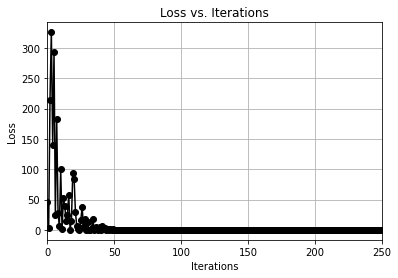

In [123]:
lossVsepochs(loss)
plt.xlabel("Iterations")
plt.title("Loss vs. Iterations")
plt.xlim(0,250)
plt.show()

(-0.14, 0.0)

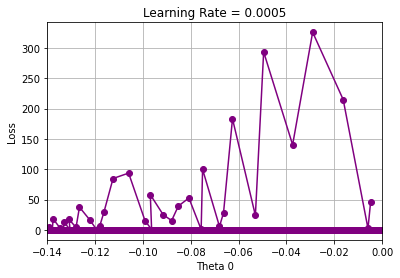

In [124]:
lossVStheta0(th0,loss,0.0005)
plt.xlim(-0.14,0)

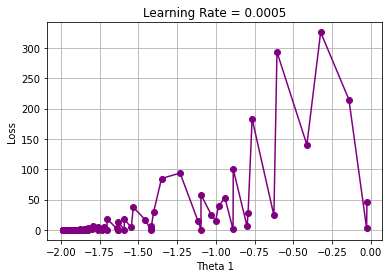

In [125]:
lossVStheta1(th1,loss,0.0005)

C:\Users\Computec\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


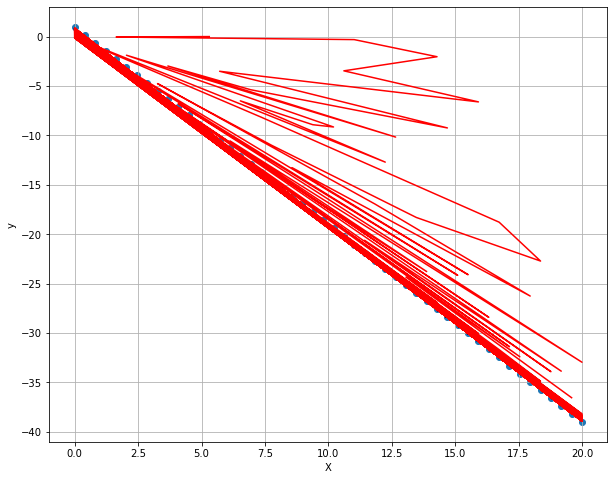

In [128]:
all_Reg(X,lines,y)

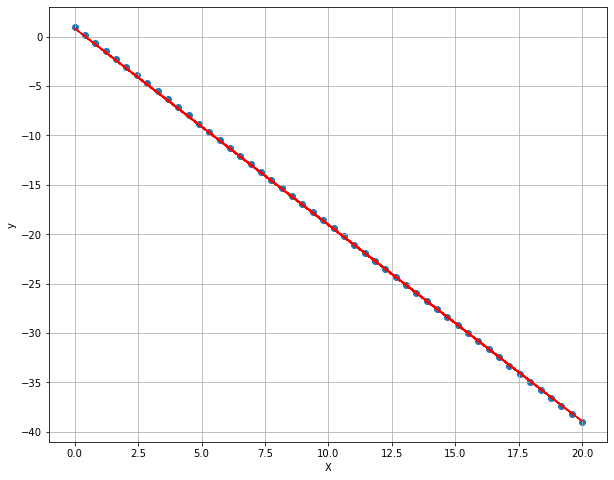

In [127]:
best_Reg(X,y,lines)

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [146]:
th0 = []
th1 = []
loss = []
lines = []
SGD(X,y,0.0001,300)

****************** Epoch0**************************

Cost=  [205.03309633]

Gradient Norm =  [397.25294324]

Grad_vector: 
[[[20.25009118]],[[396.7364802]]]
theta_0_new=  [-0.07104627]
theta_1_new=  [-0.95151062]
****************** Epoch1**************************

Cost=  [0.10745844]

Gradient Norm =  [9.09442811]

Grad_vector: 
[[[0.46359128]],[[9.08260457]]]
theta_0_new=  [-0.0734984]
theta_1_new=  [-1.92245501]
****************** Epoch2**************************

Cost=  [0.09451266]

Gradient Norm =  [8.52903946]

Grad_vector: 
[[[0.43477041]],[[8.51795097]]]
theta_0_new=  [-0.00676042]
theta_1_new=  [-1.92727588]
****************** Epoch3**************************

Cost=  [0.08312649]

Gradient Norm =  [7.99880027]

Grad_vector: 
[[[0.40774131]],[[7.98840114]]]
theta_0_new=  [0.05582856]
theta_1_new=  [-1.93179704]
****************** Epoch4**************************

Cost=  [0.07311204]

Gradient Norm =  [7.50152536]

Grad_vector: 
[[[0.38239257]],[[7.49177273]]]
theta_0_new=  [0.

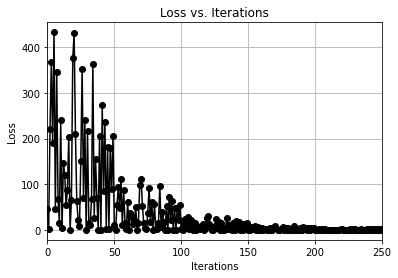

In [147]:
lossVsepochs(loss)
plt.xlabel("Iterations")
plt.title("Loss vs. Iterations")
plt.xlim(0,250)
plt.show()

(-0.2, 0.2)

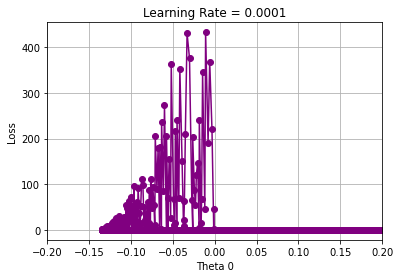

In [148]:
lossVStheta0(th0,loss,0.0001)
plt.xlim(-0.20,0.2)

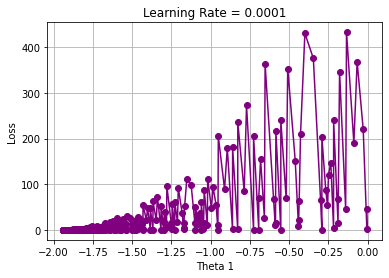

In [149]:
lossVStheta1(th1,loss,0.0001)

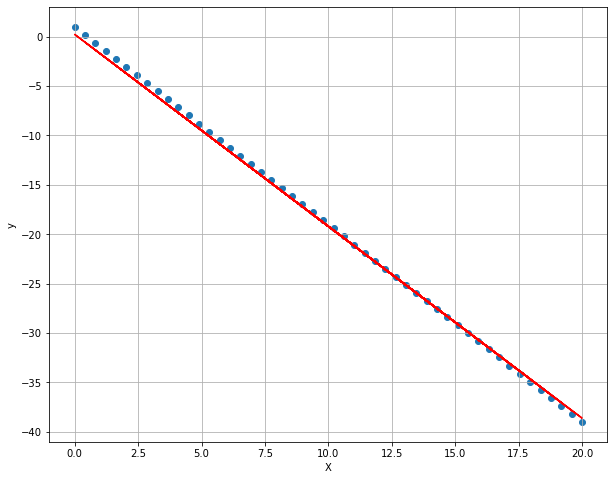

In [150]:
best_Reg(X,y,lines)

In [139]:
y_pred = th0[-1] + th1[-1]*X
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.99886897874222

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [151]:
th0 = []
th1 = []
loss = []
lines = []
SGD(X,y,0.00007,300)

****************** Epoch0**************************

Cost=  [300.54534225]

Gradient Norm =  [480.96130726]

Grad_vector: 
[[[24.51715082]],[[480.33601613]]]
theta_0_new=  [-0.05409371]
theta_1_new=  [-0.72851218]
****************** Epoch1**************************

Cost=  [0.11564269]

Gradient Norm =  [9.43439887]

Grad_vector: 
[[[0.48092139]],[[9.42213334]]]
theta_0_new=  [-0.09376641]
theta_1_new=  [-1.92028658]
****************** Epoch2**************************

Cost=  [0.10570992]

Gradient Norm =  [9.02013451]

Grad_vector: 
[[[0.45980414]],[[9.00840756]]]
theta_0_new=  [-0.04573914]
theta_1_new=  [-1.92378679]
****************** Epoch3**************************

Cost=  [0.0966303]

Gradient Norm =  [8.6240605]

Grad_vector: 
[[[0.43961414]],[[8.61284848]]]
theta_0_new=  [0.00017926]
theta_1_new=  [-1.92713331]
****************** Epoch4**************************

Cost=  [0.08833054]

Gradient Norm =  [8.24537811]

Grad_vector: 
[[[0.42031069]],[[8.2346584]]]
theta_0_new=  [0.0

In [152]:
y_pred = th0[-1] + th1[-1]*X
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9985788802480076

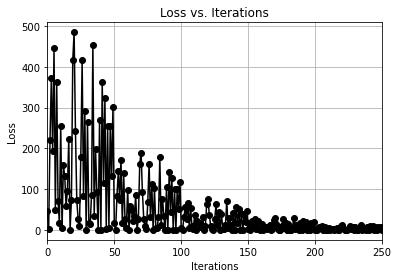

In [153]:
lossVsepochs(loss)
plt.xlabel("Iterations")
plt.title("Loss vs. Iterations")
plt.xlim(0,250)
plt.show()

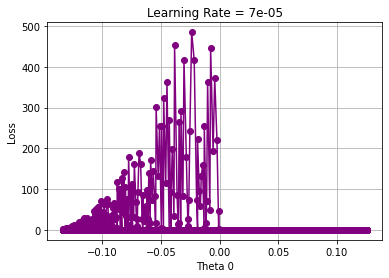

In [155]:
lossVStheta0(th0,loss,0.00007)

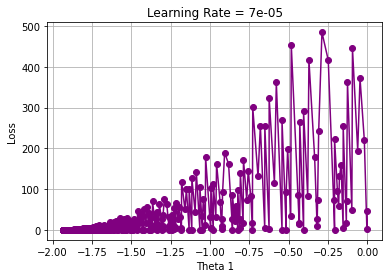

In [156]:
lossVStheta1(th1,loss,0.00007)

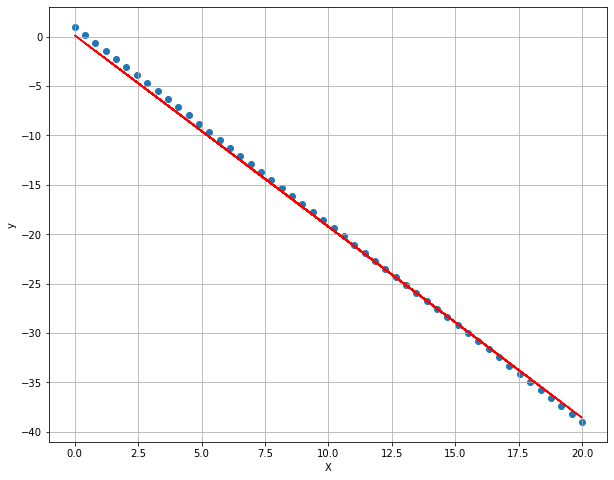

In [157]:
best_Reg(X,y,lines)

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [259]:
y = y.reshape((len(X),))
X = X.reshape((len(X),))
def miniBatchGD(x,y,alpha,iter_max,size):
    theta_0,theta_1 =0,0
    ep = 0
    m = len(x)
    for i in range(iter_max):
        start = 0
        end = size
        y_pred = []
        for j in range(0,m,size):
            yhat = theta_0 + theta_1 * X[start:end]
            
            e = yhat - y[start:end]
            
            j = (e.T @ e) / (2*size)
            loss.append(j)


            d_theta_0 = np.sum(e)/size
            d_theta_1 = (e.T @ x[start:end])/size
            

            theta_0 = theta_0 - (alpha * d_theta_0)
            theta_1 = theta_1 - (alpha * d_theta_1)
            th0.append(theta_0)
            th1.append(theta_1)
            
            for num in yhat:
                y_pred.append(num)
           
            start += size
            end += size
           
            
        Grad_norm = np.sqrt(((d_theta_0)**2 + (d_theta_1)**2))
        lines.append(y_pred)
       
        
        if (i%x.shape[0]) == 0:
            print(f'****************** Epoch{ep}**************************')
            print("\nCost= ",loss[-1])
            print("\nGradient Norm = ",Grad_norm)
            print(f"\nGrad_vector: \n[[{d_theta_0}],[{d_theta_1}]]")
            print("theta_0_new= ",th0[-1])
            print("theta_1_new= ",th1[-1])
            
            ep += 1
            
        if i != 0 and (Grad_norm < 0.001 or abs(loss[-1] - loss[-2]) < 0.001):
            break
            
    
        

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [260]:
th0 = []
th1 = []
loss = []
lines = []

miniBatchGD(X,y,0.0005,300,5)

****************** Epoch0**************************

Cost=  139.5536573814446

Gradient Norm =  255.33406105420528

Grad_vector: 
[[15.202303651192262],[254.8810952152583]]
theta_0_new=  -0.07244554418111195
theta_1_new=  -0.9688791317154183
****************** Epoch1**************************

Cost=  0.11303743587366559

Gradient Norm =  3.3819714011665245

Grad_vector: 
[[0.03903562520039507],[3.3817461138106566]]
theta_0_new=  -0.07363933910317882
theta_1_new=  -1.922446517129496
****************** Epoch2**************************

Cost=  0.09941980642934707

Gradient Norm =  3.171722905957186

Grad_vector: 
[[0.036608880416240906],[3.1715116241389003]]
theta_0_new=  -0.006893932750504321
theta_1_new=  -1.9272678184173015
****************** Epoch3**************************

Cost=  0.08744269395402651

Gradient Norm =  2.9745450209021733

Grad_vector: 
[[0.034333000136424374],[2.97434687393309]]
theta_0_new=  0.055702082734185865
theta_1_new=  -1.931789391759341
****************** Epo

In [261]:
y_pred = th0[-1] + th1[-1]*X
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.998868662998869

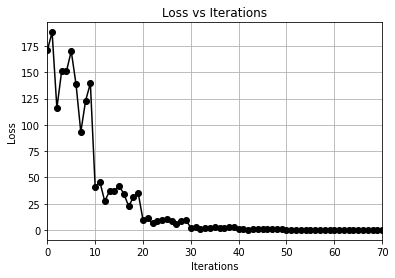

In [262]:
lossVsepochs(loss)
plt.title("Loss vs Iterations")
plt.xlabel("Iterations")
plt.xlim(0,70)
plt.show()

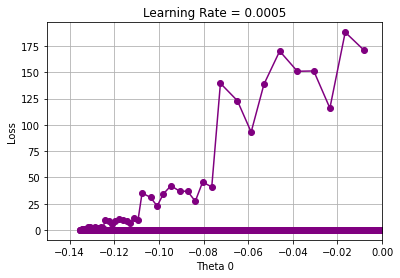

In [263]:
lossVStheta0(th0,loss,0.0005)
plt.xlim(-0.15,0)
plt.show()

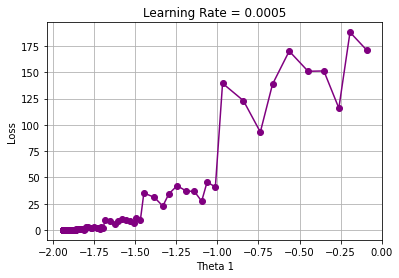

In [264]:
lossVStheta1(th1,loss,0.0005)

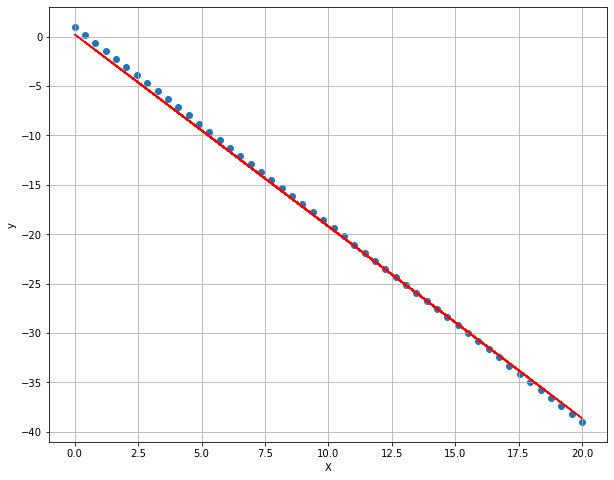

In [265]:
best_Reg(X,y,lines)

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [266]:
th0 = []
th1 = []
loss = []
lines = []
miniBatchGD(X,y,0.0005,300,10)

****************** Epoch0**************************

Cost=  234.7725064652192

Gradient Norm =  308.6834171820852

Grad_vector: 
[[18.5162163899998],[308.1275738615548]]
theta_0_new=  -0.04202039818269799
theta_1_new=  -0.5681367085874208
****************** Epoch1**************************

Cost=  0.17609501479397377

Gradient Norm =  3.08012996819236

Grad_vector: 
[[-0.08813412669531466],[3.0788687852307577]]
theta_0_new=  -0.1073629473499819
theta_1_new=  -1.9188500776075446
****************** Epoch2**************************

Cost=  0.16514732876118535

Gradient Norm =  2.982843222307345

Grad_vector: 
[[-0.08535099795876651],[2.9816218566431774]]
theta_0_new=  -0.07238903866345918
theta_1_new=  -1.9214130707065005
****************** Epoch3**************************

Cost=  0.1548803453718329

Gradient Norm =  2.8886359043630336

Grad_vector: 
[[-0.08265535222672313],[2.8874531131645265]]
theta_0_new=  -0.03851971077862763
theta_1_new=  -1.9238950864486803
****************** Epoch4

In [267]:
y_pred = th0[-1] + th1[-1]*X
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9983458960523429

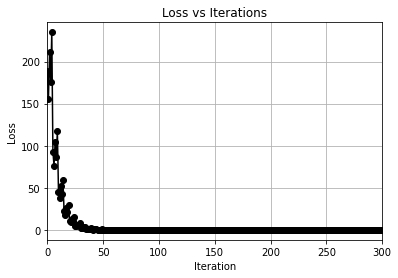

In [268]:
lossVsepochs(loss)
plt.title("Loss vs Iterations")
plt.xlabel("Iteration")
plt.xlim(0,300)
plt.show()

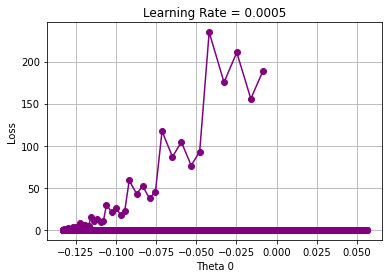

In [269]:
lossVStheta0(th0,loss,0.0005)

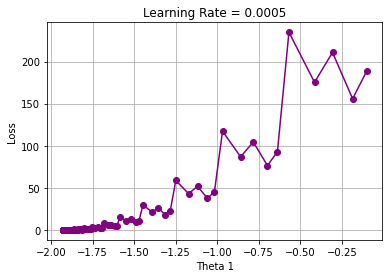

In [270]:
lossVStheta1(th1,loss,0.0005)

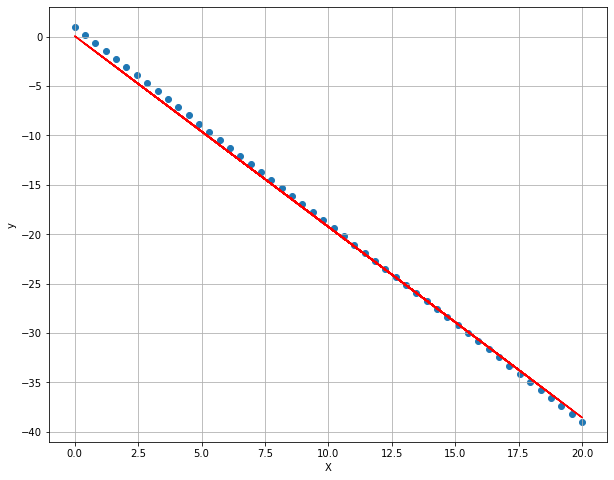

In [271]:
best_Reg(X,y,lines)

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [272]:
th0=[]
th1=[]
loss=[]
lines=[]
miniBatchGD(X,y,0.0005,300,20)

****************** Epoch0**************************

Cost=  149.41235923358894

Gradient Norm =  174.14054434862584

Grad_vector: 
[[10.464074625880718],[173.82586783404741]]
theta_0_new=  -0.02258708012035904
theta_1_new=  -0.30656573121193464
****************** Epoch1**************************

Cost=  0.09111234456151611

Gradient Norm =  1.5812760446916543

Grad_vector: 
[[-0.04373075004560578],[1.5806712343229794]]
theta_0_new=  -0.12486560309263778
theta_1_new=  -1.9166282951362905
****************** Epoch2**************************

Cost=  0.08781749502298196

Gradient Norm =  1.5284909205668722

Grad_vector: 
[[-0.04472476219683219],[1.5278364408213994]]
theta_0_new=  -0.10699159097389897
theta_1_new=  -1.9182131615662628
****************** Epoch3**************************

Cost=  0.08504580105492368

Gradient Norm =  1.504172505951012

Grad_vector: 
[[-0.04401359575767498],[1.5035284270832485]]
theta_0_new=  -0.0893825375069901
theta_1_new=  -1.9195141975137298
****************

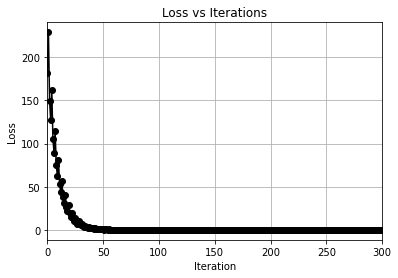

In [273]:
lossVsepochs(loss)
plt.title("Loss vs Iterations")
plt.xlabel("Iteration")
plt.xlim(0,300)
plt.show()

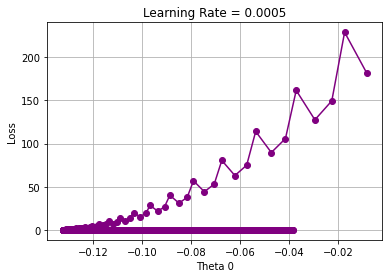

In [274]:
lossVStheta0(th0,loss,0.0005)

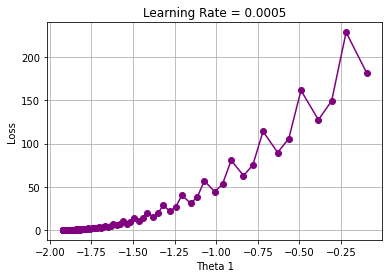

In [275]:
lossVStheta1(th1,loss,0.0005)

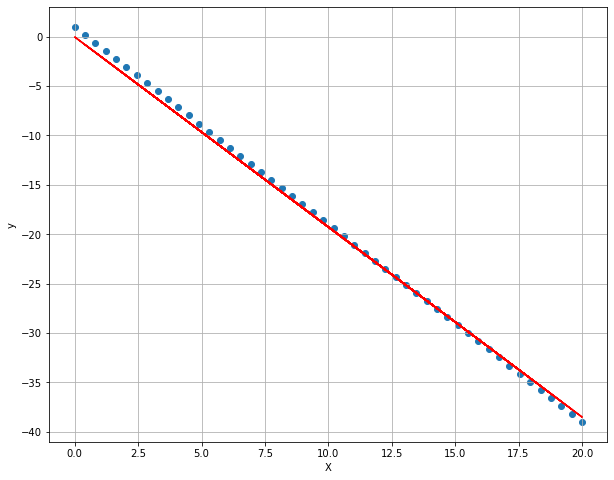

In [276]:
best_Reg(X,y,lines)

In [277]:
y_pred = th0[-1] + th1[-1]*X
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9979979379156434